<a href="https://colab.research.google.com/github/abdalrahmenyousifMohamed/ML/blob/main/clustring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df = pd.read_csv("https://github.com/microsoft/ML-For-Beginners/blob/main/5-Clustering/data/nigerian-songs.csv?raw=True")

In [2]:
df.head()

,name,album,artist,artist_top_genre,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,Sparky,Mandy & The Jungle,Cruel Santino,alternative r&b,2019,144000,48,0.666,0.8510,0.420,0.534000,0.1100,-6.699,0.0829,133.015,5
1,shuga rush,EVERYTHING YOU HEARD IS TRUE,Odunsi (The Engine),afropop,2020,89488,30,0.710,0.0822,0.683,0.000169,0.1010,-5.640,0.3600,129.993,3
2,LITT!,LITT!,AYLØ,indie r&b,2018,207758,40,0.836,0.2720,0.564,0.000537,0.1100,-7.127,0.0424,130.005,4
3,Confident / Feeling Cool,Enjoy Your Life,Lady Donli,nigerian pop,2019,175135,14,0.894,0.7980,0.611,0.000187,0.0964,-4.961,0.1130,111.087,4
4,wanted you,rare.,Odunsi (The Engine),afropop,2018,152049,25,0.702,0.1160,0.833,0.910000,0.3480,-6.044,0.0447,105.115,4


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530 entries, 0 to 529
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              530 non-null    object 
 1   album             530 non-null    object 
 2   artist            530 non-null    object 
 3   artist_top_genre  530 non-null    object 
 4   release_date      530 non-null    int64  
 5   length            530 non-null    int64  
 6   popularity        530 non-null    int64  
 7   danceability      530 non-null    float64
 8   acousticness      530 non-null    float64
 9   energy            530 non-null    float64
 10  instrumentalness  530 non-null    float64
 11  liveness          530 non-null    float64
 12  loudness          530 non-null    float64
 13  speechiness       530 non-null    float64
 14  tempo             530 non-null    float64
 15  time_signature    530 non-null    int64  
dtypes: float64(8), int64(4), object(4)
memory us

In [4]:
df.shape

(530, 16)

In [5]:
df.isnull().sum()

name                0
album               0
artist              0
artist_top_genre    0
release_date        0
length              0
popularity          0
danceability        0
acousticness        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
time_signature      0
dtype: int64

In [6]:
df.describe()

,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
count,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000
mean,2015.390566,222298.169811,17.507547,0.741619,0.265412,0.760623,0.016305,0.147308,-4.953011,0.130748,116.487864,3.986792
std,3.131688,39696.822259,18.992212,0.117522,0.208342,0.148533,0.090321,0.123588,2.464186,0.092939,23.518601,0.333701
min,1998.000000,89488.000000,0.000000,0.255000,0.000665,0.111000,0.000000,0.028300,-19.362000,0.027800,61.695000,3.000000
25%,2014.000000,199305.000000,0.000000,0.681000,0.089525,0.669000,0.000000,0.075650,-6.298750,0.059100,102.961250,4.000000
50%,2016.000000,218509.000000,13.000000,0.761000,0.220500,0.784500,0.000004,0.103500,-4.558500,0.097950,112.714500,4.000000
75%,2017.000000,242098.500000,31.000000,0.829500,0.403000,0.875750,0.000234,0.164000,-3.331000,0.177000,125.039250,4.000000
max,2020.000000,511738.000000,73.000000,0.966000,0.954000,0.995000,0.910000,0.811000,0.582000,0.514000,206.007000,5.000000


In [7]:
df["artist_top_genre"].value_counts()[:2]

afro dancehall    328
afropop            90
Name: artist_top_genre, dtype: int64

In [8]:
df[df['artist_top_genre']!="Missing"]

,name,album,artist,artist_top_genre,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,Sparky,Mandy & The Jungle,Cruel Santino,alternative r&b,2019,144000,48,0.666,0.8510,0.420,0.534000,0.1100,-6.699,0.0829,133.015,5
1,shuga rush,EVERYTHING YOU HEARD IS TRUE,Odunsi (The Engine),afropop,2020,89488,30,0.710,0.0822,0.683,0.000169,0.1010,-5.640,0.3600,129.993,3
2,LITT!,LITT!,AYLØ,indie r&b,2018,207758,40,0.836,0.2720,0.564,0.000537,0.1100,-7.127,0.0424,130.005,4
3,Confident / Feeling Cool,Enjoy Your Life,Lady Donli,nigerian pop,2019,175135,14,0.894,0.7980,0.611,0.000187,0.0964,-4.961,0.1130,111.087,4
4,wanted you,rare.,Odunsi (The Engine),afropop,2018,152049,25,0.702,0.1160,0.833,0.910000,0.3480,-6.044,0.0447,105.115,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,Kwaroro,Kwaroro,J. Martins,afro dancehall,2015,193960,10,0.735,0.6320,0.918,0.193000,0.0718,-2.582,0.0355,127.954,4
526,Concert Party,Afro Escape,Various Artists,afro dancehall,2015,252708,0,0.602,0.1770,0.883,0.000004,0.1190,-6.183,0.0778,154.010,4
527,Loko,Applaudise,Iyanya,afro dancehall,2015,223159,0,0.729,0.2380,0.864,0.000000,0.1950,-3.942,0.0668,121.058,4
528,Gift,Applaudise,Iyanya,afro dancehall,2015,278280,0,0.809,0.0490,0.806,0.000000,0.0659,-6.547,0.2340,123.997,4


Text(0.5, 1.0, 'Top genres')

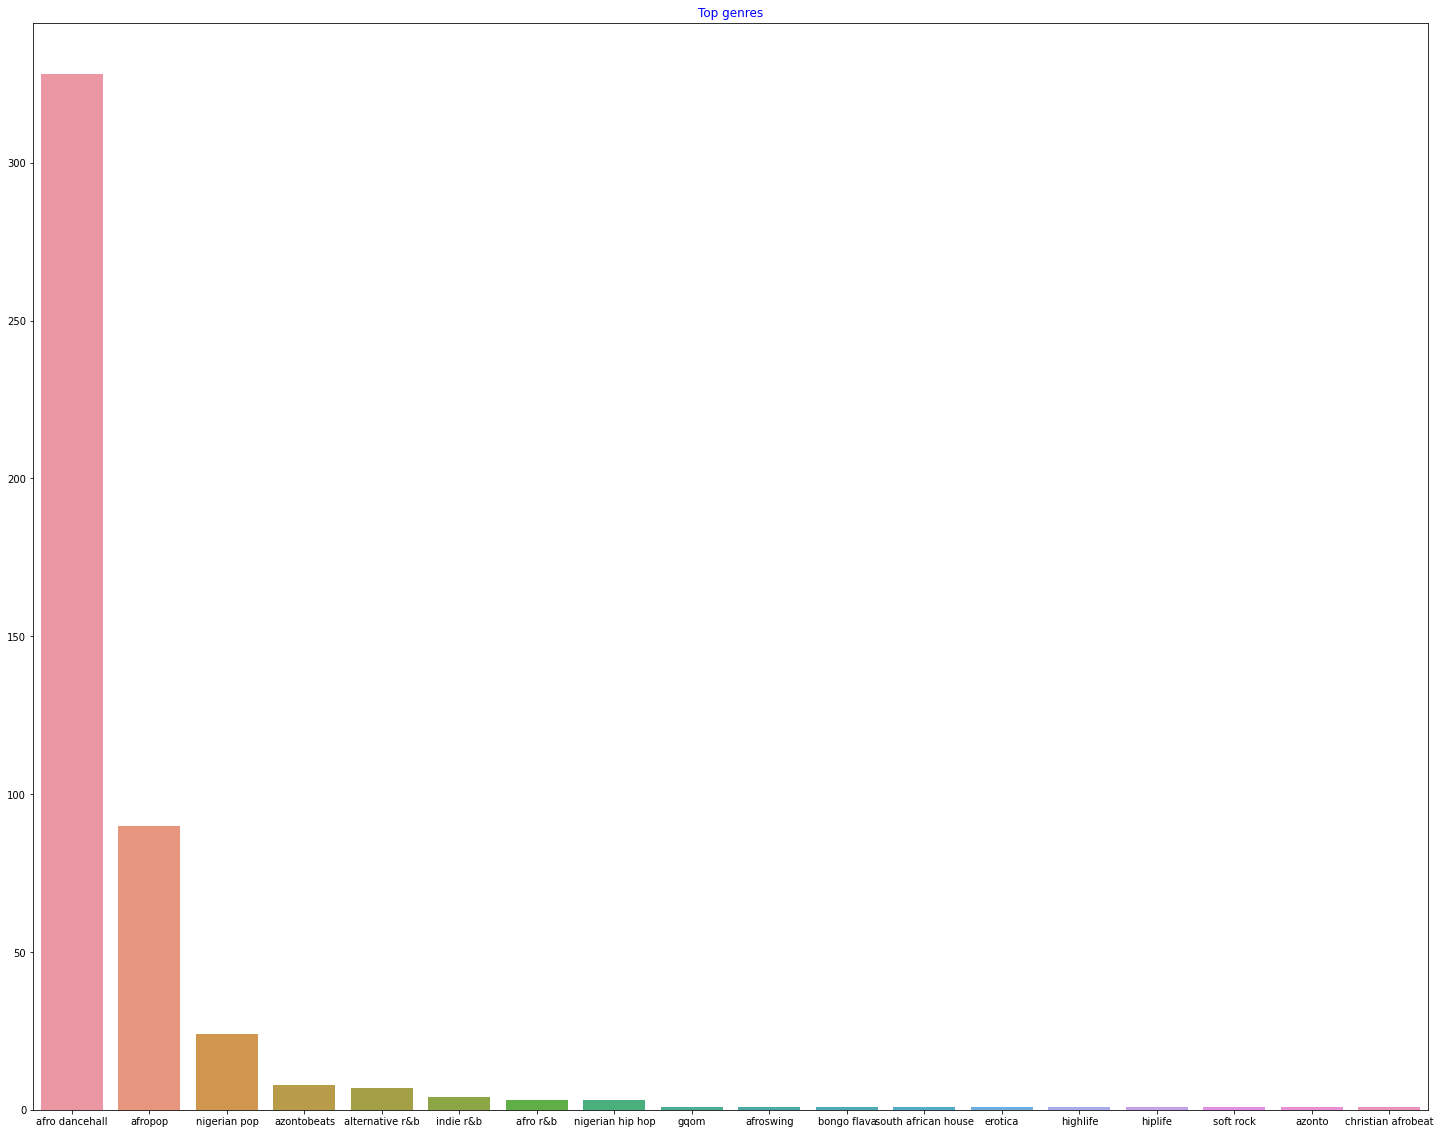

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
df = df[df["artist_top_genre"] !="Missing"]
top = df["artist_top_genre"].value_counts()
plt.figure(figsize=(25,20))
sns.barplot(x=top.index , y=top.values)
plt.xticks(rotation=0)
plt.title("Top genres" , color='blue')

1. By far , the top three genres dominate this dataset , let's concentrate on 'afro dancehell' , 'afropop' , nigerian pop' , **additionally** filter the dataset to remove anything with a 0 popularity value (meaning it was not classified with a popularity in the dataset and can be considered noise for our purpose)

In [10]:
df[(df['artist_top_genre'] == 'afro dancehall') | (df['artist_top_genre'] == 'afropop') | (df['artist_top_genre'] == 'nigerian pop')]


,name,album,artist,artist_top_genre,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
1,shuga rush,EVERYTHING YOU HEARD IS TRUE,Odunsi (The Engine),afropop,2020,89488,30,0.710,0.0822,0.683,0.000169,0.1010,-5.640,0.3600,129.993,3
3,Confident / Feeling Cool,Enjoy Your Life,Lady Donli,nigerian pop,2019,175135,14,0.894,0.7980,0.611,0.000187,0.0964,-4.961,0.1130,111.087,4
4,wanted you,rare.,Odunsi (The Engine),afropop,2018,152049,25,0.702,0.1160,0.833,0.910000,0.3480,-6.044,0.0447,105.115,4
5,Kasala,Pioneers,DRB Lasgidi,nigerian pop,2020,184800,26,0.803,0.1270,0.525,0.000007,0.1290,-10.034,0.1970,100.103,4
6,Pull Up,Everything Pretty,prettyboydo,nigerian pop,2018,202648,29,0.818,0.4520,0.587,0.004490,0.5900,-9.840,0.1990,95.842,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,Kwaroro,Kwaroro,J. Martins,afro dancehall,2015,193960,10,0.735,0.6320,0.918,0.193000,0.0718,-2.582,0.0355,127.954,4
526,Concert Party,Afro Escape,Various Artists,afro dancehall,2015,252708,0,0.602,0.1770,0.883,0.000004,0.1190,-6.183,0.0778,154.010,4
527,Loko,Applaudise,Iyanya,afro dancehall,2015,223159,0,0.729,0.2380,0.864,0.000000,0.1950,-3.942,0.0668,121.058,4
528,Gift,Applaudise,Iyanya,afro dancehall,2015,278280,0,0.809,0.0490,0.806,0.000000,0.0659,-6.547,0.2340,123.997,4


Text(0.5, 1.0, 'Top genres')

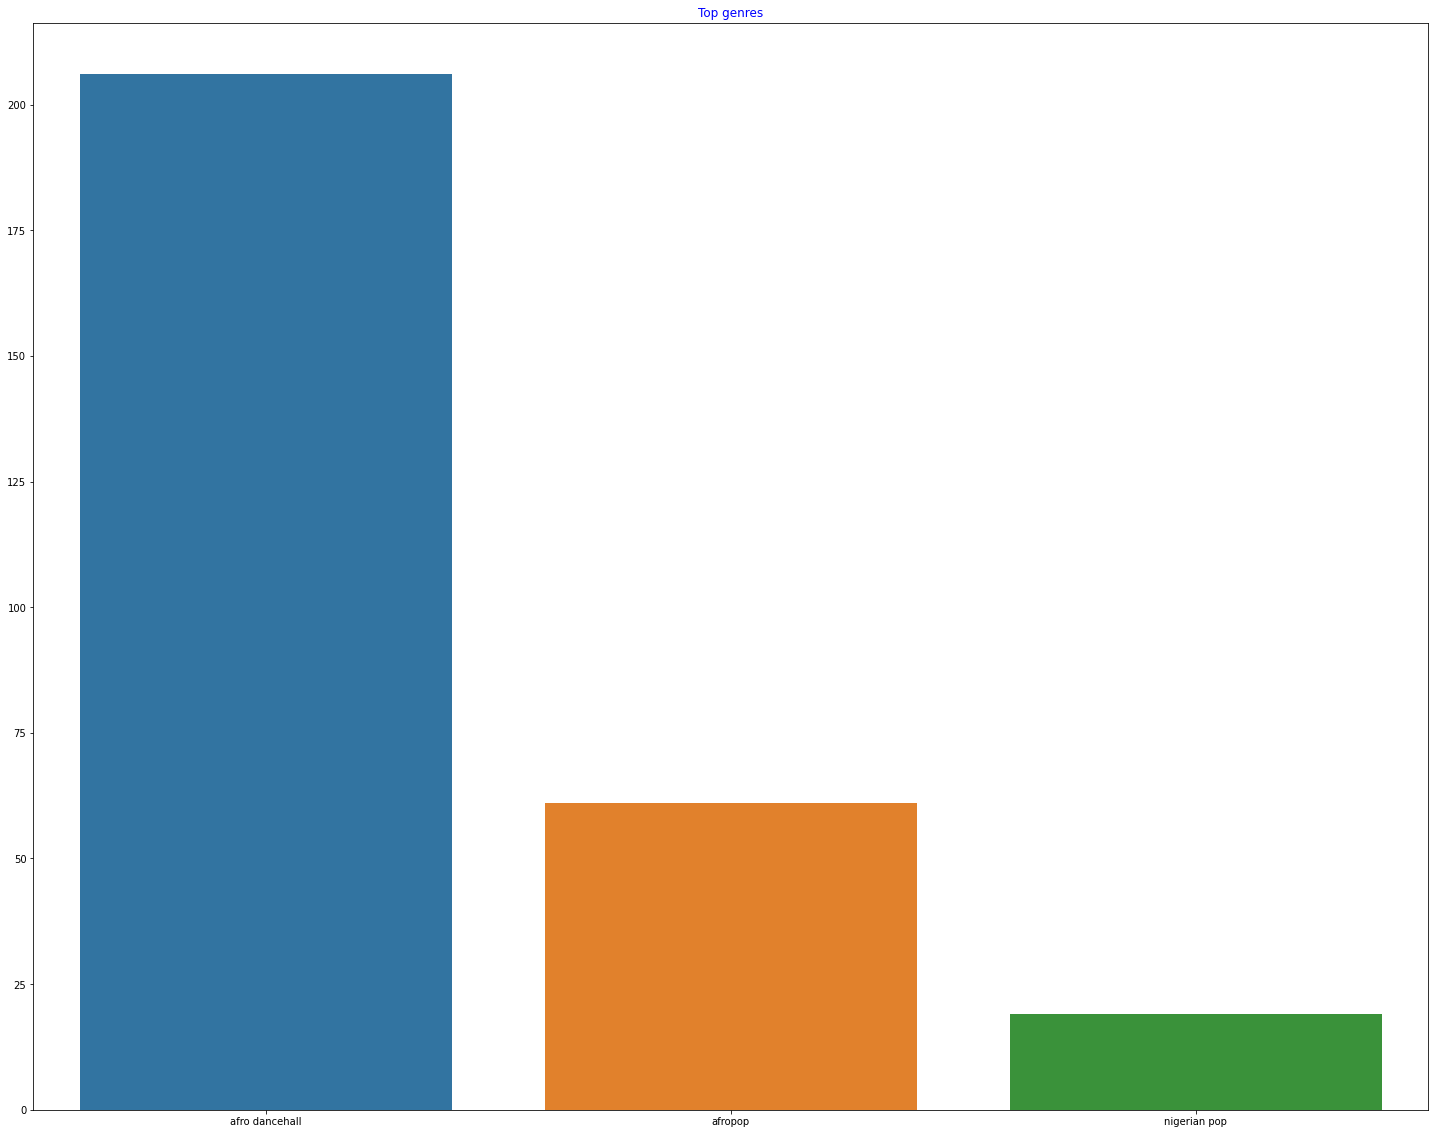

In [11]:
df = df[(df['artist_top_genre'] == 'afro dancehall') | (df['artist_top_genre'] == 'afropop') | (df['artist_top_genre'] == 'nigerian pop')]
df = df[(df['popularity'] > 0)]
top = df['artist_top_genre'].value_counts()
plt.figure(figsize=(25,20))
sns.barplot(x=top.index , y=top.values)
plt.xticks(rotation=0)
plt.title("Top genres" , color='blue')

doing any quick test to see if the data correlates in any particularly strong way

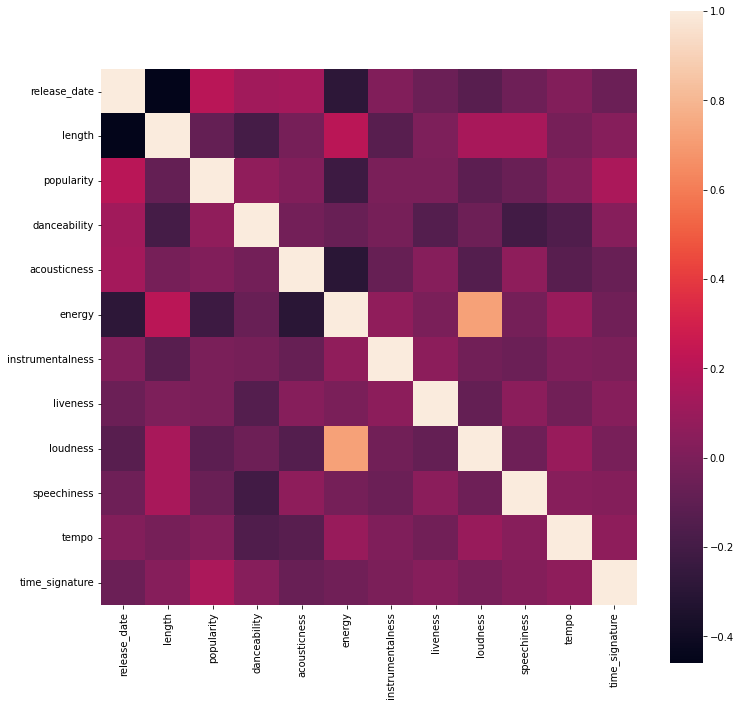

In [12]:
corrmat = df.corr()
f,ax = plt.subplots(figsize=(12,12))
sns.heatmap(corrmat , vmax=1 , square=True)

In [13]:
df.head()

,name,album,artist,artist_top_genre,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
1,shuga rush,EVERYTHING YOU HEARD IS TRUE,Odunsi (The Engine),afropop,2020,89488,30,0.710,0.0822,0.683,0.000169,0.1010,-5.640,0.3600,129.993,3
3,Confident / Feeling Cool,Enjoy Your Life,Lady Donli,nigerian pop,2019,175135,14,0.894,0.7980,0.611,0.000187,0.0964,-4.961,0.1130,111.087,4
4,wanted you,rare.,Odunsi (The Engine),afropop,2018,152049,25,0.702,0.1160,0.833,0.910000,0.3480,-6.044,0.0447,105.115,4
5,Kasala,Pioneers,DRB Lasgidi,nigerian pop,2020,184800,26,0.803,0.1270,0.525,0.000007,0.1290,-10.034,0.1970,100.103,4
6,Pull Up,Everything Pretty,prettyboydo,nigerian pop,2018,202648,29,0.818,0.4520,0.587,0.004490,0.5900,-9.840,0.1990,95.842,4


# Excerice - Data Distribution
Are these three genres significantly different in the perception of their danceability, based on their popularity?

1. Examine our top three genres data distribution for popularity and danceability along a give x and y axis

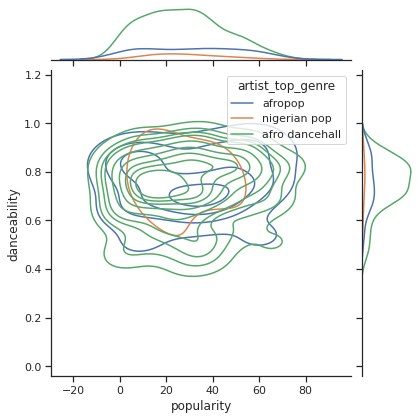

In [14]:
sns.set_theme(style='ticks')

g = sns.jointplot(
    data=df,
    x='popularity',y='danceability',hue='artist_top_genre',kind="kde"
)

in general , the three genres align loosely in terms of their popularity and danceability.
Determining clusters in this loosely-aligned data will be a challene

Is there any convergence in this dataset around a song's perceived popularity and danceability? A **FacetGrid** shows that there are **concentric circles** that line up, regardless of genre. Could it be that Nigerian tastes converge at a certain level of danceability for this genre?



/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


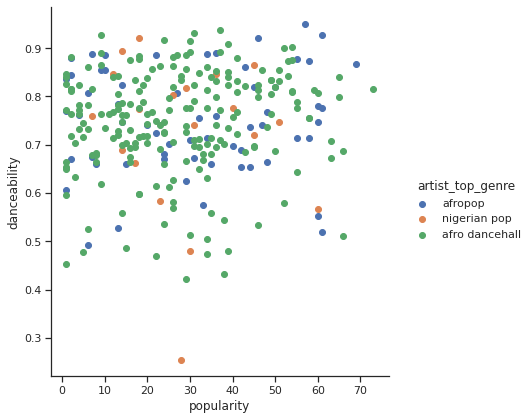

In [24]:
# create a scatter plot :
g = sns.FacetGrid(df,hue="artist_top_genre" ,margin_titles=True, size=6).map(plt.scatter , "popularity" , "danceability").add_legend()


In [30]:
(df.head())

,name,album,artist,artist_top_genre,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
1,shuga rush,EVERYTHING YOU HEARD IS TRUE,Odunsi (The Engine),afropop,2020,89488,30,0.710,0.0822,0.683,0.000169,0.1010,-5.640,0.3600,129.993,3
3,Confident / Feeling Cool,Enjoy Your Life,Lady Donli,nigerian pop,2019,175135,14,0.894,0.7980,0.611,0.000187,0.0964,-4.961,0.1130,111.087,4
4,wanted you,rare.,Odunsi (The Engine),afropop,2018,152049,25,0.702,0.1160,0.833,0.910000,0.3480,-6.044,0.0447,105.115,4
5,Kasala,Pioneers,DRB Lasgidi,nigerian pop,2020,184800,26,0.803,0.1270,0.525,0.000007,0.1290,-10.034,0.1970,100.103,4
6,Pull Up,Everything Pretty,prettyboydo,nigerian pop,2018,202648,29,0.818,0.4520,0.587,0.004490,0.5900,-9.840,0.1990,95.842,4


In [123]:
df2 = df.copy()

In [124]:
df.head()

,name,album,artist,artist_top_genre,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
1,shuga rush,EVERYTHING YOU HEARD IS TRUE,Odunsi (The Engine),afropop,2020,89488,30,0.710,0.0822,0.683,0.000169,0.1010,-5.640,0.3600,129.993,3
3,Confident / Feeling Cool,Enjoy Your Life,Lady Donli,nigerian pop,2019,175135,14,0.894,0.7980,0.611,0.000187,0.0964,-4.961,0.1130,111.087,4
4,wanted you,rare.,Odunsi (The Engine),afropop,2018,152049,25,0.702,0.1160,0.833,0.910000,0.3480,-6.044,0.0447,105.115,4
5,Kasala,Pioneers,DRB Lasgidi,nigerian pop,2020,184800,26,0.803,0.1270,0.525,0.000007,0.1290,-10.034,0.1970,100.103,4
6,Pull Up,Everything Pretty,prettyboydo,nigerian pop,2018,202648,29,0.818,0.4520,0.587,0.004490,0.5900,-9.840,0.1990,95.842,4


In [128]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df2["artist_top_genre"] = LE.fit_transform(df2["artist_top_genre"])
df2["artist_top_genre"].head()
df2["artist_top_genre"].unique()

array([1, 2, 0])

In [74]:
df2.columns

Index(['name', 'album', 'artist', 'artist_top_genre', 'release_date', 'length',
       'popularity', 'danceability', 'acousticness', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'time_signature'],
      dtype='object')

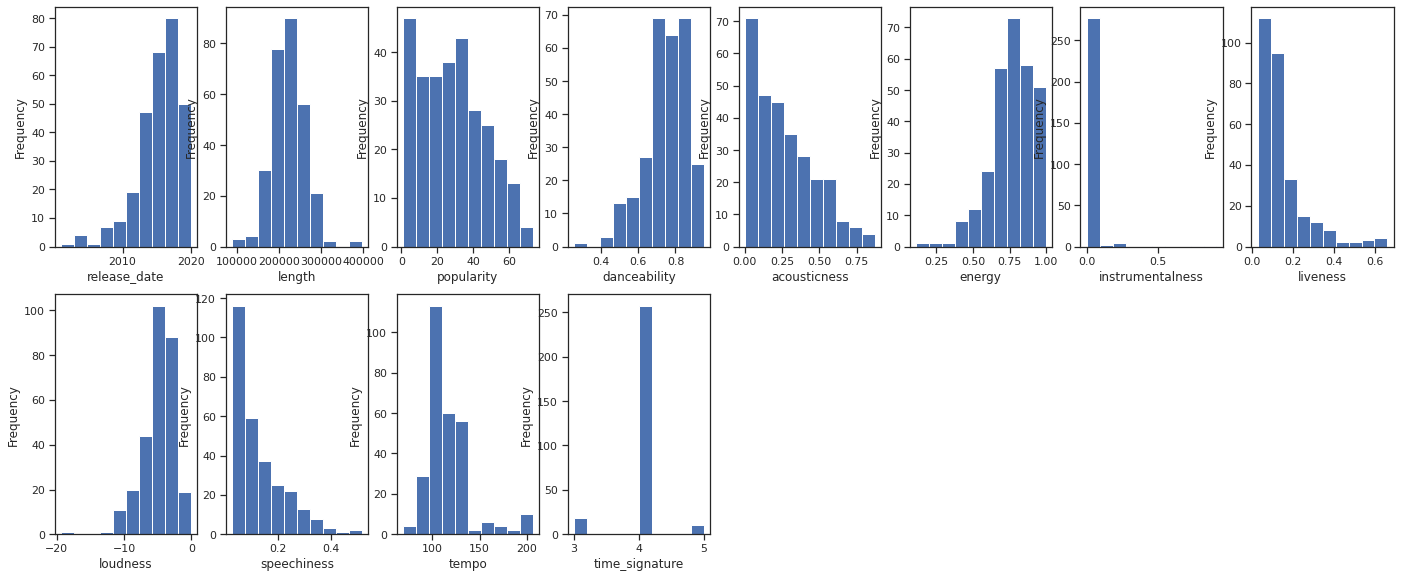

In [125]:
import matplotlib.pyplot as plt
# select numeric variables
numeric_vars2 =  [ 'release_date', 'length',
       'popularity', 'danceability', 'acousticness', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'time_signature']
# create histograms for each numeric variable
fig = plt.figure(figsize=(24, 15))
for i in range(len(numeric_vars2)):
    var = numeric_vars2[i]
    sub = fig.add_subplot(3, 8, i + 1)
    sub.set_xlabel(var)
    df2[var].plot(kind = 'hist')

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


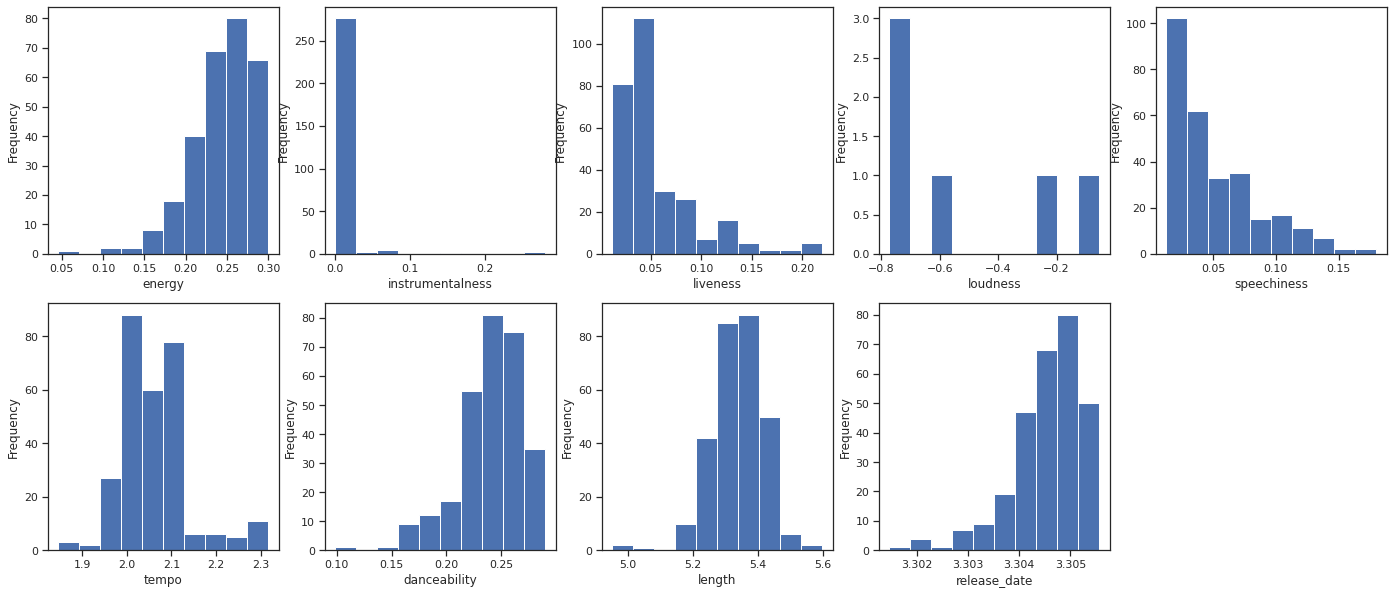

In [126]:
log_vars = ['energy','instrumentalness','liveness','loudness','speechiness','tempo','danceability', 'length','release_date'
]
import numpy as np
# log transformation - power low distribution
#df2 = pd.DataFrame()
fig = plt.figure(figsize=(24,10))
for i in range(len(log_vars)):
    var = log_vars[i]
    transformed = "log_" + var
    df2[transformed] = np.log10(df[var]+1)
    sub = fig.add_subplot(2,5,i+1)
    sub.set_xlabel(var)
    df2[transformed].plot(kind="hist")

In [129]:
from sklearn.preprocessing import MinMaxScaler
columns = ['artist_top_genre', 'release_date', 'length',
       'popularity', 'danceability', 'acousticness', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'time_signature']

RS = MinMaxScaler()
for i in columns:
  df2[i] = RS.fit_transform(df2[i].to_numpy().reshape(-1,1))


In [115]:
df2["artist_top_genre"].unique()

array([0.5, 1. , 0. ])

In [81]:
df2.head()

,name,album,artist,artist_top_genre,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
1,shuga rush,EVERYTHING YOU HEARD IS TRUE,Odunsi (The Engine),1.0,1.000000,0.000000,0.402778,0.653736,0.093682,0.647059,0.000186,0.115269,0.712979,0.681555,0.444049,0.0
3,Confident / Feeling Cool,Enjoy Your Life,Lady Donli,1.0,0.947368,0.279219,0.180556,0.918103,0.916124,0.565611,0.000205,0.107975,0.748259,0.170802,0.305775,0.5
4,wanted you,rare.,Odunsi (The Engine),1.0,0.894737,0.203956,0.333333,0.642241,0.132518,0.816742,1.000000,0.506897,0.691988,0.029570,0.262097,0.5
5,Kasala,Pioneers,DRB Lasgidi,1.0,1.000000,0.310728,0.347222,0.787356,0.145157,0.468326,0.000007,0.159664,0.484672,0.344500,0.225440,0.5
6,Pull Up,Everything Pretty,prettyboydo,1.0,0.894737,0.368914,0.388889,0.808908,0.518576,0.538462,0.004934,0.890598,0.494752,0.348635,0.194276,0.5


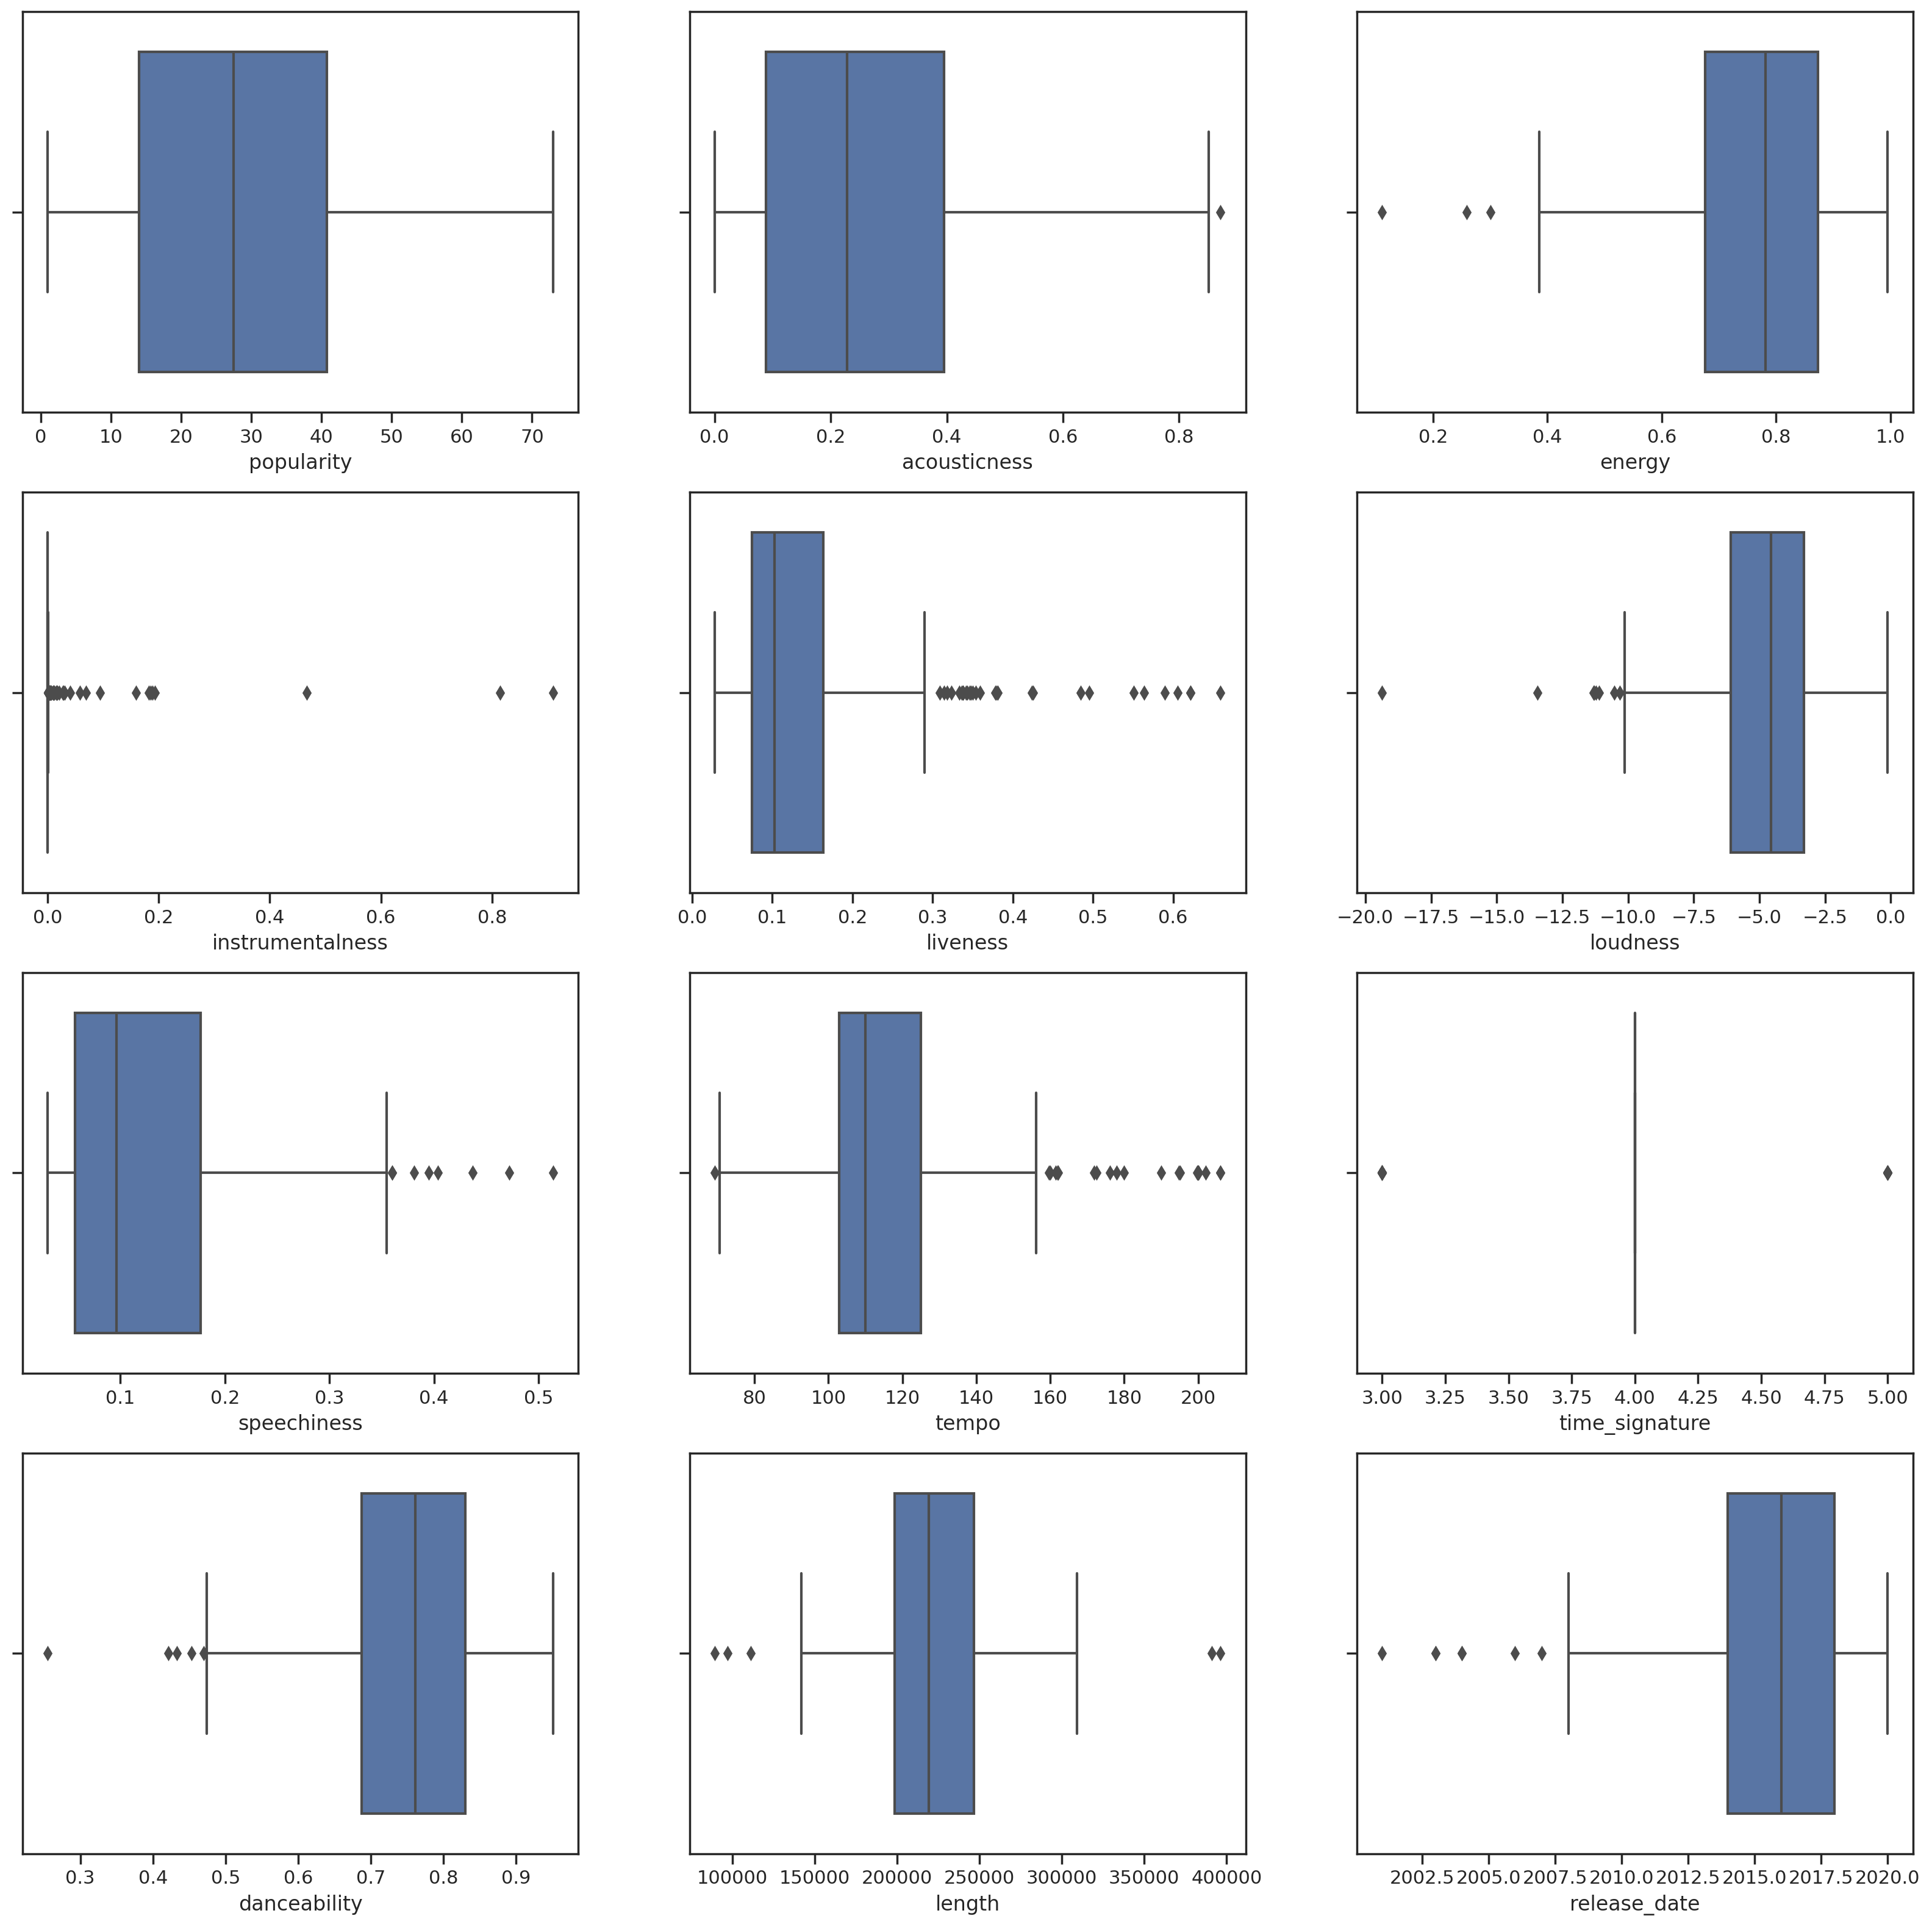

In [121]:
plt.figure(figsize=(20,20),dpi = 200)

plt.subplot(4,3,1)
sns.boxplot(x = 'popularity' , data=df2)

plt.subplot(4,3,2)
sns.boxplot(x = 'acousticness' , data=df2)

plt.subplot(4,3,3)
sns.boxplot(x = 'energy' , data=df2)

plt.subplot(4,3,4)
sns.boxplot(x = 'instrumentalness' , data=df2)

plt.subplot(4,3,5)
sns.boxplot(x = 'liveness' , data=df2)

plt.subplot(4,3,6)
sns.boxplot(x = 'loudness' , data=df2)

plt.subplot(4,3,7)
sns.boxplot(x = 'speechiness' , data=df2)

plt.subplot(4,3,8)
sns.boxplot(x = 'tempo' , data=df2)


plt.subplot(4,3,9)
sns.boxplot(x = 'time_signature' , data=df2)


plt.subplot(4,3,10)
sns.boxplot(x = 'danceability' , data=df2)

plt.subplot(4,3,11)
sns.boxplot(x = 'length' , data=df2)

plt.subplot(4,3,12)
sns.boxplot(x = 'release_date' , data=df2)



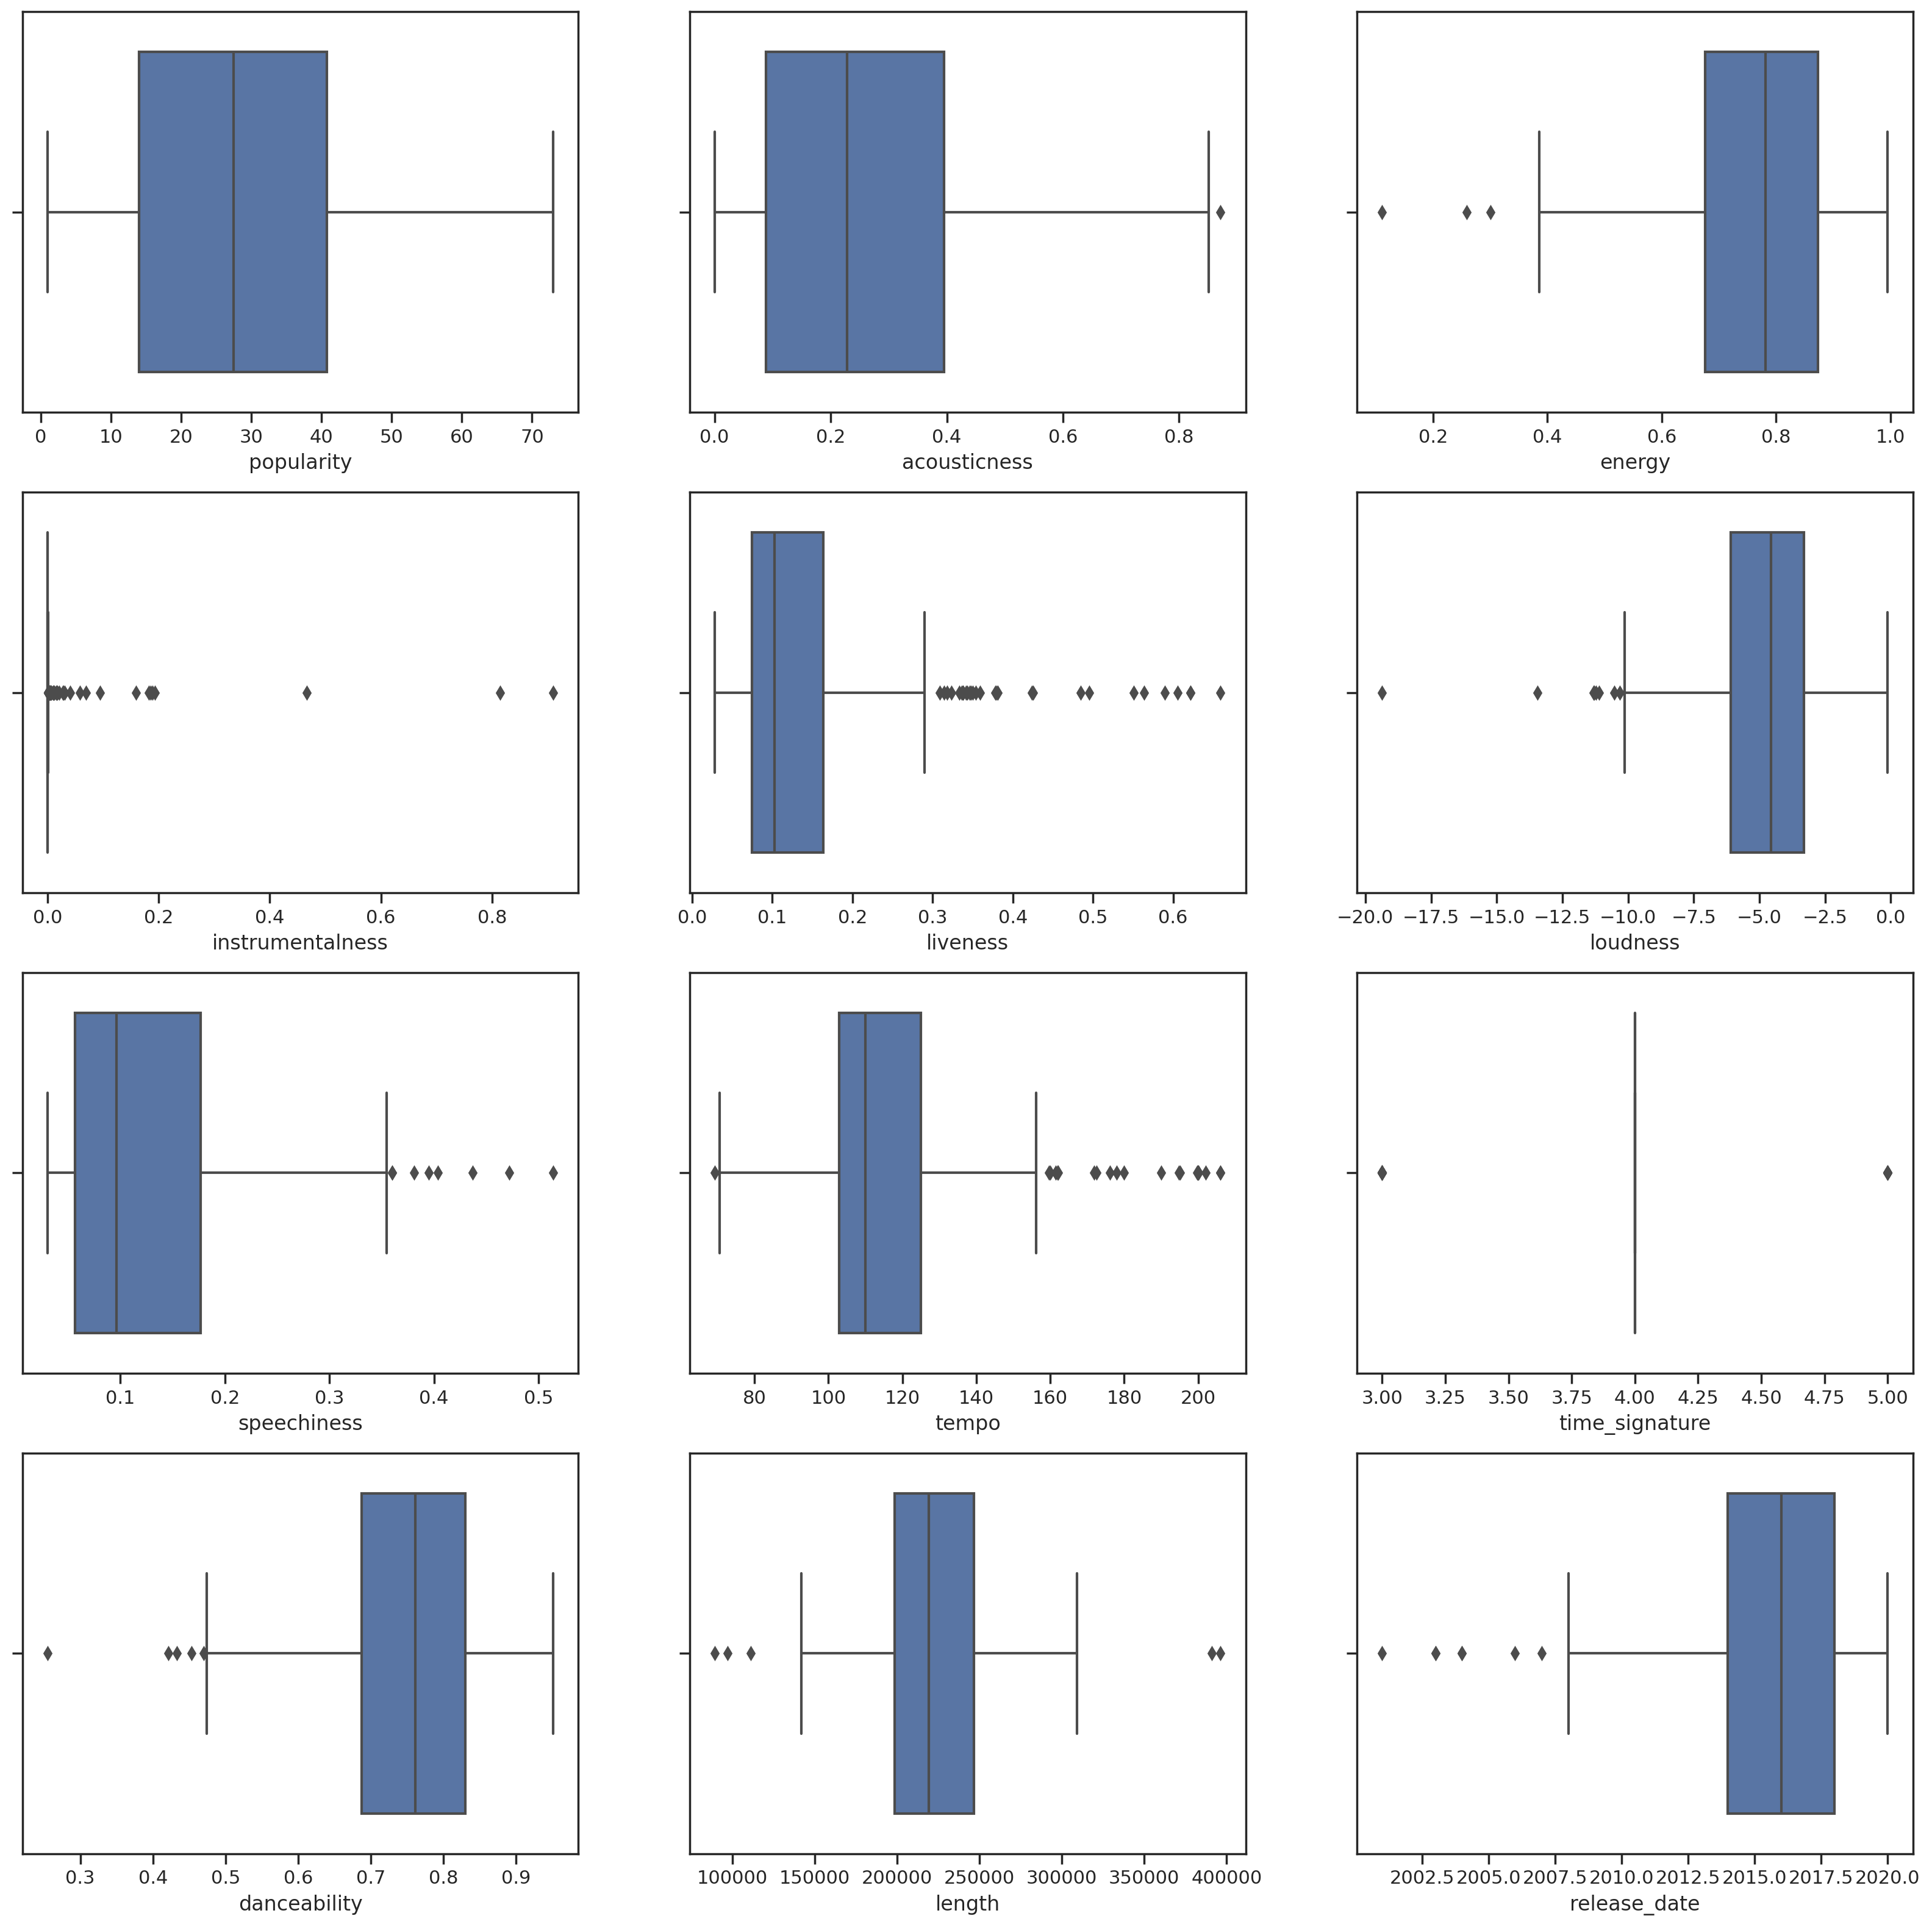

In [130]:
plt.figure(figsize=(20,20),dpi = 200)

plt.subplot(4,3,1)
sns.boxplot(x = 'popularity' , data=df)

plt.subplot(4,3,2)
sns.boxplot(x = 'acousticness' , data=df)

plt.subplot(4,3,3)
sns.boxplot(x = 'energy' , data=df)

plt.subplot(4,3,4)
sns.boxplot(x = 'instrumentalness' , data=df)

plt.subplot(4,3,5)
sns.boxplot(x = 'liveness' , data=df)

plt.subplot(4,3,6)
sns.boxplot(x = 'loudness' , data=df)

plt.subplot(4,3,7)
sns.boxplot(x = 'speechiness' , data=df)

plt.subplot(4,3,8)
sns.boxplot(x = 'tempo' , data=df)


plt.subplot(4,3,9)
sns.boxplot(x = 'time_signature' , data=df)


plt.subplot(4,3,10)
sns.boxplot(x = 'danceability' , data=df)

plt.subplot(4,3,11)
sns.boxplot(x = 'length' , data=df)

plt.subplot(4,3,12)
sns.boxplot(x = 'release_date' , data=df)




1. For now, choose which columns you will use for your clustering exercise. Pick ones with similar ranges and encode the artist_top_genre column as numeric data:



In [91]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X = df.loc[: , ("artist_top_genre" , "popularity","danceability" ,"loudness" , "energy", "acousticness")]
y = df["artist_top_genre"]
X['artist_top_genre'] = le.fit_transform(X["artist_top_genre"])
y = le.transform(y)

In [131]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X = df2.loc[: , ("artist_top_genre" , "popularity","danceability" ,"loudness" , "energy", "acousticness")]
y = df2["artist_top_genre"]
#X['artist_top_genre'] = le.fit_transform(X["artist_top_genre"])
#y = le.transform(y)

2. Now you need to pick how many clusters to target. You know there are 3 song genres that we carved out of the dataset, so let's try 3:



In [132]:
from sklearn.cluster import KMeans

noclusters = 3
seed = 0
km = KMeans(n_clusters=noclusters , random_state=seed)
km.fit(X)
# predict the cluster for each data point
y_cluster_kmeans = km.predict(X)
y_cluster_kmeans

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       0, 1, 0, 0, 2, 0, 0, 1, 1, 1, 2, 2, 2, 0, 1, 1, 2, 2, 1, 0, 1, 0,
       0, 0, 2, 1, 2, 0, 1, 0, 0, 0, 2, 0, 1, 1, 1, 0, 1, 1, 2, 1, 1, 0,
       1, 2, 2, 0, 0, 2, 1, 1, 1, 1, 2, 1, 0, 1, 2, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 1, 0, 2, 2, 1, 1, 0, 1, 1, 1, 0,
       1, 2, 0, 1, 2, 0, 2, 2, 1, 0, 1, 0, 1, 1, 0, 1, 1, 2, 0, 1, 2, 1,
       0, 1, 2, 0, 1, 0, 1, 1, 1, 1, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0,
       0, 1, 0, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 1, 1, 2,
       2, 2, 0, 0, 1, 0, 0, 0, 1, 0, 0, 2, 2, 1, 0, 1, 1, 1, 1, 2, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 0, 2, 0,
       1, 1, 0, 2, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 1, 2, 1, 0, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 2, 1, 1],
      dtype=int32)

In [133]:
from sklearn import metrics
score = metrics.silhouette_score(X, y_cluster_kmeans)
score

0.21879609552366455

our score is 0.54  , so right in the middle . **this indicates that our data is not particularly well-suited  to this type of clustring btw** , let's continue

In [43]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    print(kmeans.inertia_)
    wcss.append(kmeans.inertia_)


91386.65679350862
28634.205205937666
13100.549391531438
8610.607745436075
5993.581818499703
4575.435900411552
3954.4504013825103
3457.9963145753145
3096.31221943442
2808.423640396585


# Elbow method

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


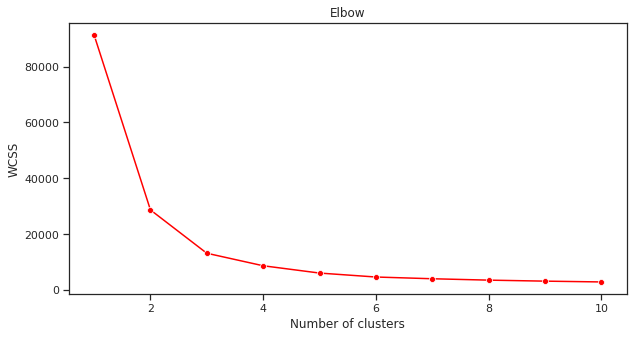

In [42]:
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 11), wcss,marker='o',color='red')
plt.title('Elbow')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

[0 2 0 0 0 0 0 0 0 2 0 0 2 0 1 0 2 2 1 2 1 1 1 2 1 0 1 1 0 0 2 2 1 0 0 0 0
 2 2 1 0 1 0 1 0 1 1 2 2 0 2 1 1 0 0 0 0 2 2 1 2 0 0 2 0 0 2 0 2 0 0 2 2 2
 2 2 0 2 0 0 1 0 2 2 2 0 0 0 0 2 0 0 0 0 2 2 0 2 2 0 2 0 2 0 2 0 0 2 0 1 2
 2 0 2 2 0 0 0 0 0 0 0 1 2 2 2 2 1 2 0 2 0 2 0 0 0 1 0 2 2 2 0 2 1 2 0 0 2
 2 2 1 2 0 0 0 2 2 1 2 0 2 2 2 2 0 1 1 1 2 1 1 1 1 1 1 0 1 2 1 1 2 1 1 0 1
 1 2 2 0 1 0 0 1 0 0 2 2 1 2 2 1 1 2 1 0 1 2 1 0 1 1 0 0 0 2 2 2 2 2 1 0 0
 0 0 0 2 2 2 2 2 0 0 2 2 1 2 2 2 1 0 0 0 2 2 1 1 2 2 0 1 1 1 1 1 0 1 1 0 2
 2 2 0 0 0 2 0 2 0 2 2 2 1 0 0 0 2 0 2 1 2 0 2 2 2 0 2]


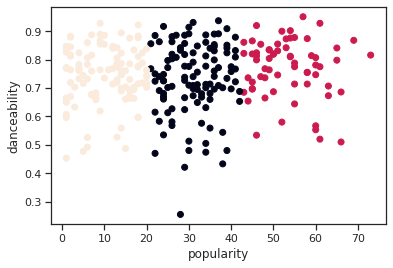

In [61]:
kmeans2 = KMeans(n_clusters=3)
labels = kmeans2.fit_predict(X)
print(labels)
plt.scatter("popularity" , "danceability" , c=labels,data=df)
plt.xlabel("popularity")
plt.ylabel("danceability")
plt.show()

In [51]:
len(y)

286

In [52]:
correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 112 out of 286 samples were correctly labeled.
Accuracy score: 0.39


# TESTS

# K-means clustering algorithm

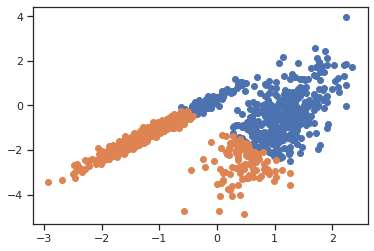

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans
# initlize the data set we'll work with
training_data , _ = make_classification(
    n_samples=1000,n_features=2,n_informative=2,n_redundant=0,n_clusters_per_class=1,random_state=4
)
# define model 
kmeans_model = KMeans(n_clusters=2)

# assign each data point to a cluster
dbscan_result = kmeans_model.fit_predict(training_data)

# get all of unique clusters
dbscan_clusters = np.unique(dbscan_result)

# plot the DBSCAN clusters
for dbscan_cluster in dbscan_clusters:
  # get data points that fall in this cluster
  index = np.where(dbscan_result == dbscan_cluster)
  # make the plot
  plt.scatter(training_data[index,0],training_data[index,1])

plt.show()

# DBSCAN
 uses two parameters to determine how clusters are defined: minPts (the minimum number of data points that need to be clustered together for an area to be considered high-density) and eps (the distance used to determine if a data point is in the same area as other data points).

Choosing the right initial parameters is critical for this algorithm to work